X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y:
 [0 0 0 1 1 1]


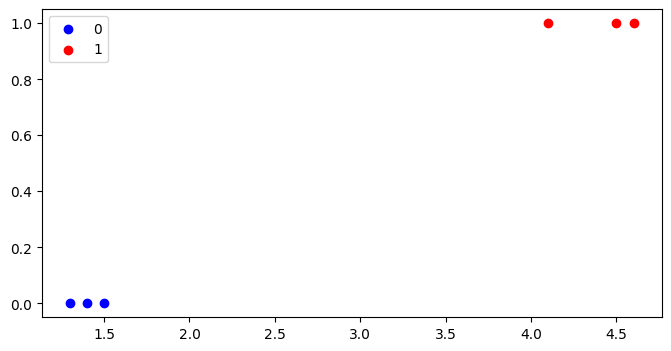

In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_1D_2c.csv', 
                     dtype=None, delimiter=',', 
                     skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]

# change data type
y = y.astype('uint8')

print('X:\n', X)
print('y:\n', y)

plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.legend()
plt.show()

In [2]:
one_hot = np.zeros((6, 2))
print(one_hot)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [3]:
one_hot[[0, 1, 2, 3, 4, 5], [0, 0, 0, 1, 1, 1]] = 1
print(one_hot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [4]:
# one_hot
import numpy as np

def convert_one_hot(y, k):  
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, 2)
print(y_one_hot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
N = 6 # number of points

# initialize parameters randomly
w = np.array([[0.2], [-0.1]])
b = np.array([[0.1], [ 0.05]])

print('w:\n', w)
print('b:\n', b)

w:
 [[ 0.2]
 [-0.1]]
b:
 [[0.1 ]
 [0.05]]


In [9]:
# some parameters
learning_rate = 0.1
losses = []
max_epoch = 1

for epoch in range(max_epoch):
    for i in range(N): 
        xi = X[i]
        yi = y_one_hot[i]
        yi = yi.reshape((2,1))
        
        # evaluate class scores
        z = xi*w + b    
                  
        #compute the class probabilities
        exp_z = np.exp(z)
        y_hat = exp_z / np.sum(exp_z, axis=0)
        
        # compute the loss
        loss = -np.log(yi.T.dot(y_hat))
        losses.append(loss[0])
           
        # compute the gradient on scores
        dz = y_hat - yi
         
        # backpropate the gradient to the parameters (W,b)
        dw = dz*xi
        db = dz
        
        # perform a parameter update
        w += -learning_rate * dw
        b += -learning_rate * db
        break

In [12]:
print(w)
print(b)

[[ 0.25384627]
 [-0.15384627]]
[[0.13846162]
 [0.01153838]]


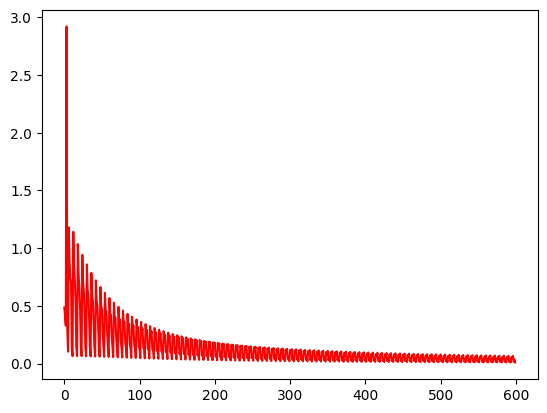

In [8]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()